# Neural Networks

## Biological background

<div>
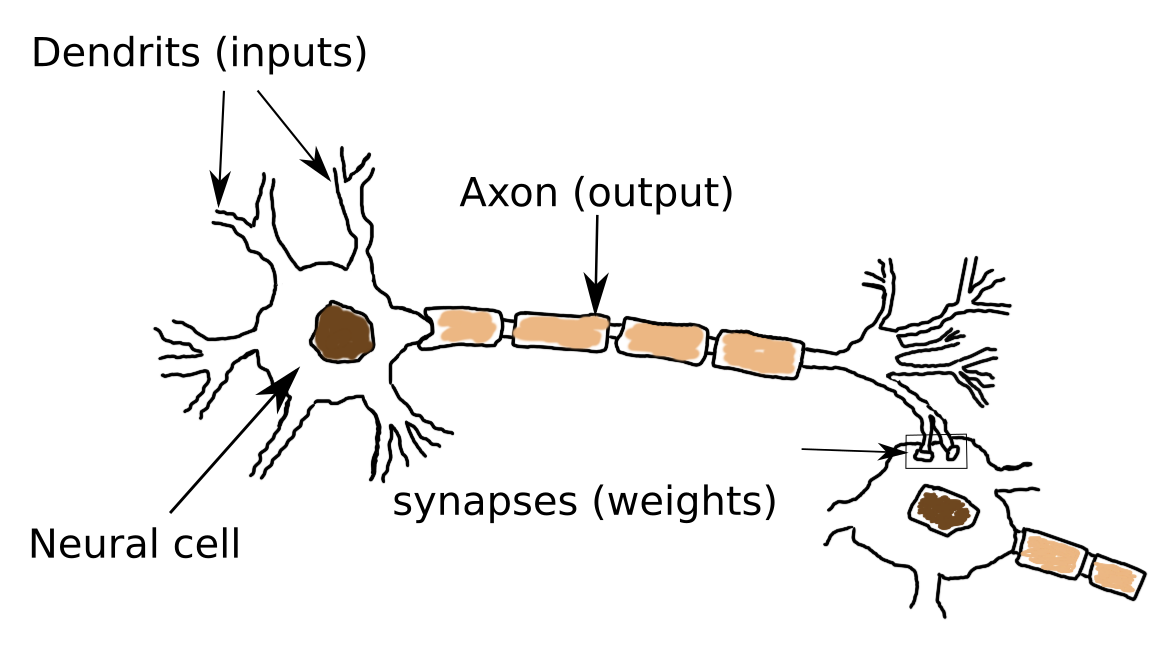
</div>

## Linear threshold unit

This first model was introduced by McCulloch and Pitts in 1943. The idea was to enable logical processing on ones (True) and zeroes (False) similar to logical gates back in that time. Equation for the LTU:

\begin{equation}
  y = \begin{cases}
    1, \hbox{ if } w_0+w_1\cdot x_1+ w_2\cdot x_2 \ge \theta \\
    0, \hbox{ if } w_0+w_1\cdot x_1+ w_2\cdot x_2 < \theta
    \end{cases} \enspace .
\end{equation}


## Perceptron (Päättelin)

Perceptron added a training algorithm based on the so called *Hebbian rule*:

\begin{equation}
w_i^{t+1} = w_i^{t}+\eta (y-\hat{y})x
\label{eq:hebb_rule}
\end{equation}


#### Demo: Perceptron regression with Hebbian learning

Let's make training data for regression

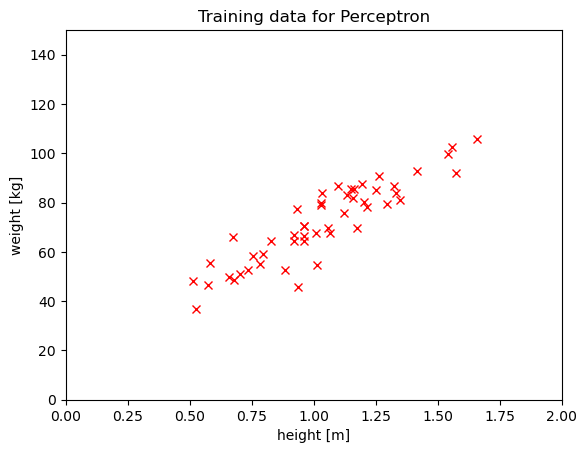

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Coodinate system
plt.xlabel('height [m]')
plt.ylabel('weight [kg]')
plt.axis([0,2,0,150])

# Generate random points
np.random.seed(42) # to always get the same points
N = 50 
x = np.random.normal(1.1,0.3,N)
a_gt = 50.0
b_gt = 20.0
y_noise =  np.random.normal(0,8,N) # Measurements from the class 1\n",
y = a_gt*x+b_gt+y_noise
plt.plot(x,y,'rx')
plt.title('Training data for Perceptron')
plt.show()

Run Hebbian learning N epochs for the linear model $y=ax+b$.

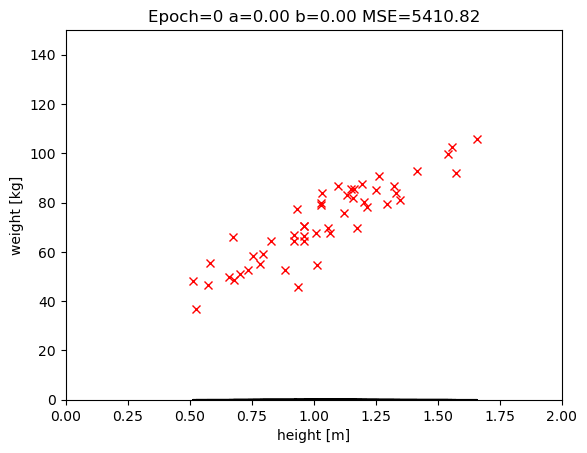

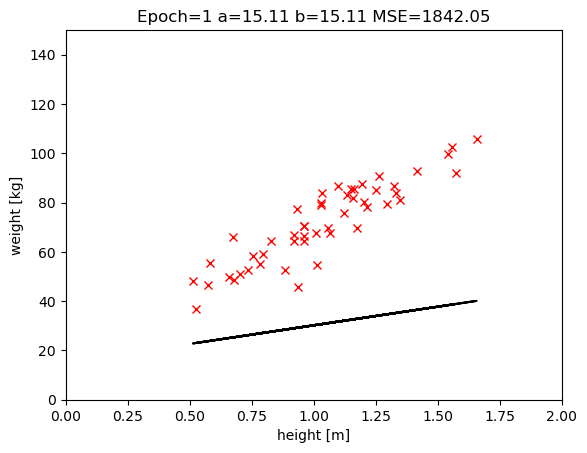

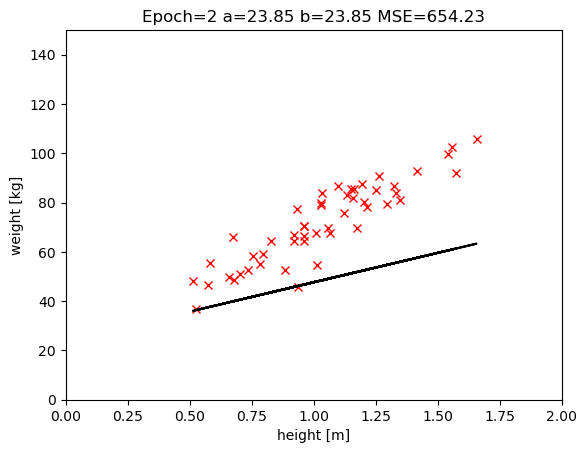

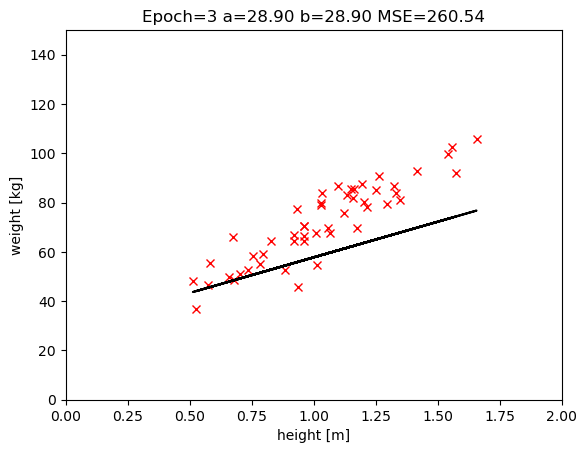

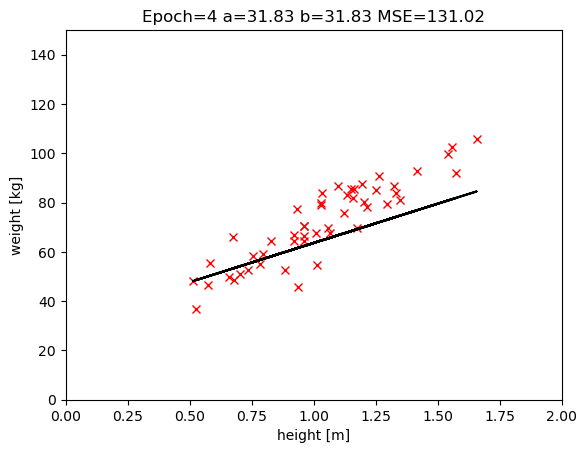

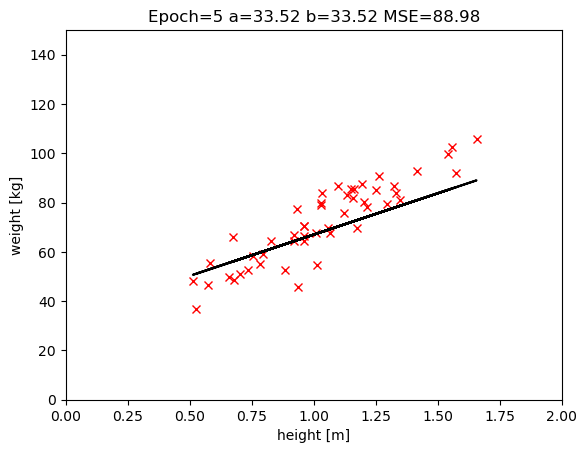

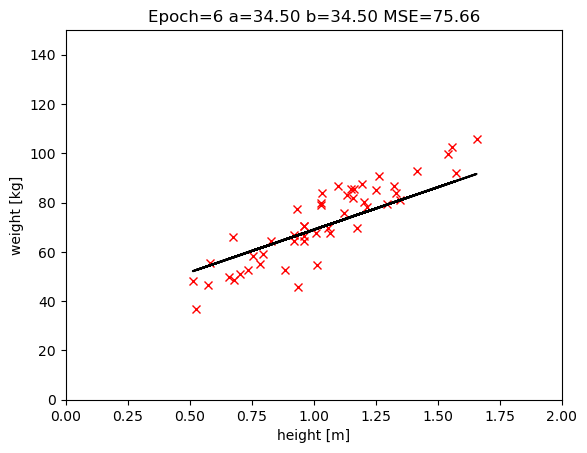

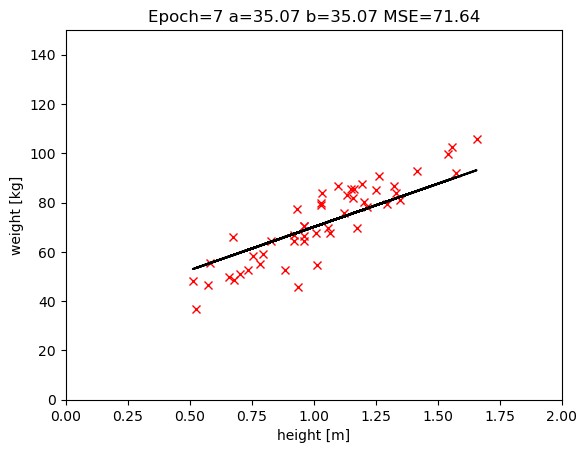

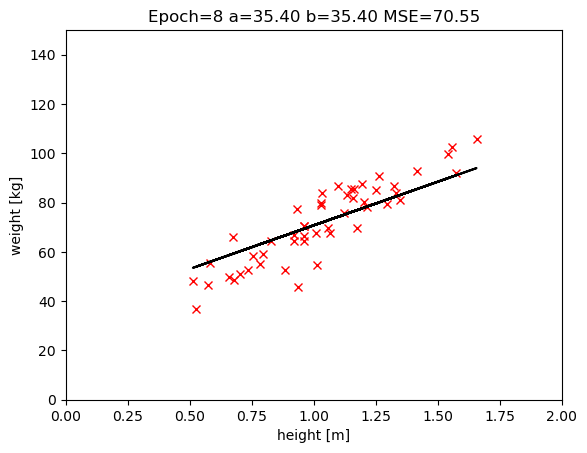

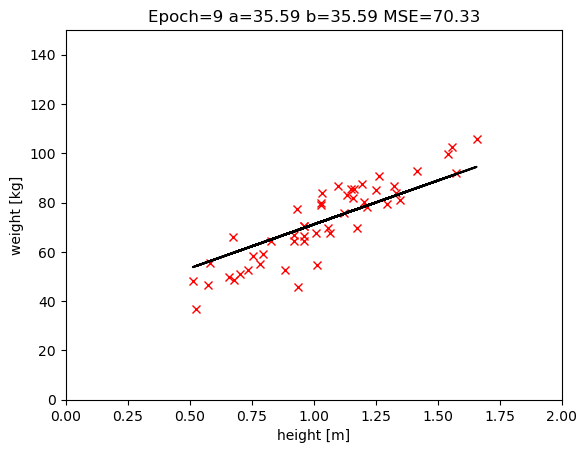

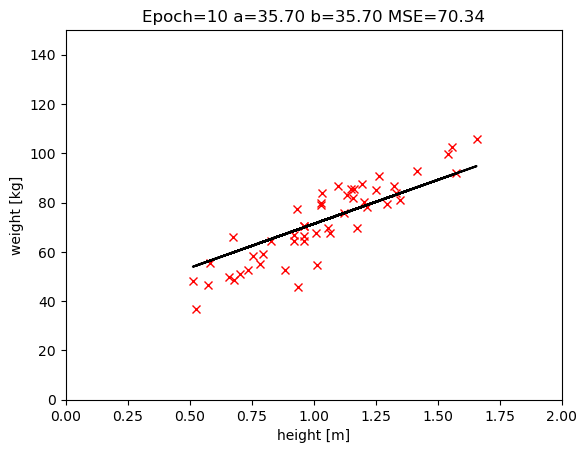

In [2]:
# Compute MSE heat map for different a and b
a_t = 0
b_t = 0
num_of_epochs = 10
learning_rate = 0.005

y_h = a_t*x+b_t
MSE = np.sum((y-y_h)**2)/N
plt.title(f'Epoch={0} a={a_t:.2f} b={b_t:.2f} MSE={MSE:.2f}')
plt.xlabel('height [m]')
plt.ylabel('weight [kg]')
plt.axis([0,2,0,150])
plt.plot(x,y,'rx')
plt.plot(x,a_t*x+b_t,'k-')
plt.show()
for e in range(num_of_epochs):
    for x_e_ind,x_e in enumerate(x):
        # Hebbian learning implemented
        y_e = a_t*x_e+b_t
        a_t = a_t+learning_rate*(y[x_e_ind]-y_e)*x_e
        b_t = b_t+learning_rate*(y[x_e_ind]-y_e)*x_e
    # Compute train error
    y_h = a_t*x+b_t
    MSE = np.sum((y-y_h)**2)/N
    plt.title(f'Epoch={e+1} a={a_t:.2f} b={b_t:.2f} MSE={MSE:.2f}')
    plt.xlabel('height [m]')
    plt.ylabel('weight [kg]')
    plt.axis([0,2,0,150])
    plt.plot(x,y,'rx')
    plt.plot(x,a_t*x+b_t,'k-')
    plt.show()

## Gradient descent

From the classification by fitting a line example we remember that the additional non-linearity (transfer function) *logsig()* prevents using a closed form solution. However, the gradient can be computed and therefore parameters iteratively moved toward negative gradient to minimize MSE. This idea is fundamental in ML and the algorithm is known as **Gradient Descent (GD)**.

## TensorFlow for ML

We will import TensorFlow package to play with neural networks. There are two main tools to develop neural networks in Python:

 * TensorFlow (by Google) https://www.tensorflow.org/
 * PyTorch (by Meta & Linux Foundation) https://pytorch.org/
 
 Keras makes neural network design easier in TF. In this course we will only use TF.

### Install

You need to install the package (via pip as conda installation is unstable)

```shell
$ pip install tensorflow
```

Let's import the TF packages and Keras helpers (Sequential and Dense) to build networks.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras

The simplest way to construct models is Sequential()

In [4]:
# Model sequential
model = Sequential()

We add just one neuron with linear activation and which thus resembles perceptron

In [5]:
model.add(Dense(1, input_dim=1, activation='linear'))

Set the optimization parameters (S stands for Stochastic)

In [9]:
# Learning rate has huge effect 
keras.optimizers.SGD(lr=0.5)
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
num_of_epochs = 30

Fit the model with data, i.e. train

In [17]:
tr_hist = model.fit(x, y, epochs=num_of_epochs, verbose=1)

Epoch 1/30
2/2 [==============================] - 0s 5ms/step - loss: 57.5826 - mse: 57.5826
Epoch 2/30
2/2 [==============================] - 0s 4ms/step - loss: 57.6528 - mse: 57.6528
Epoch 3/30
2/2 [==============================] - 0s 3ms/step - loss: 57.4850 - mse: 57.4850
Epoch 4/30
2/2 [==============================] - 0s 4ms/step - loss: 57.4314 - mse: 57.4314
Epoch 5/30
2/2 [==============================] - 0s 4ms/step - loss: 57.3907 - mse: 57.3907
Epoch 6/30
2/2 [==============================] - 0s 4ms/step - loss: 57.3911 - mse: 57.3911
Epoch 7/30
2/2 [==============================] - 0s 3ms/step - loss: 57.3834 - mse: 57.3834
Epoch 8/30
2/2 [==============================] - 0s 5ms/step - loss: 57.3410 - mse: 57.3410
Epoch 9/30
2/2 [==============================] - 0s 4ms/step - loss: 57.3188 - mse: 57.3188
Epoch 10/30
2/2 [==============================] - 0s 4ms/step - loss: 57.2438 - mse: 57.2438
Epoch 11/30
2/2 [==============================] - 0s 3ms/step - loss

We can see how the loss behaves to inspect whether our model fits or not

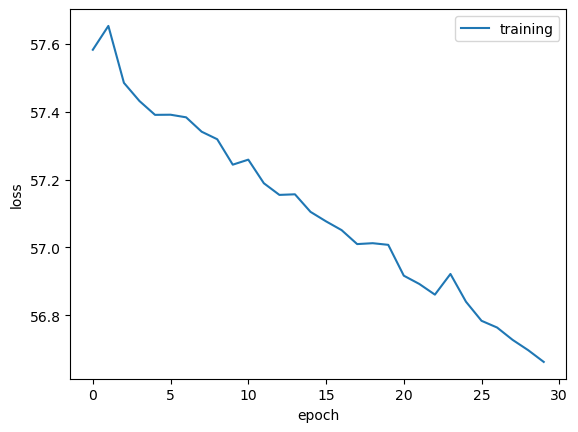

In [18]:
plt.plot(tr_hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper right')
plt.show()

Finally, let's see how well it works

2/2 [==============================] - 0s 3ms/step


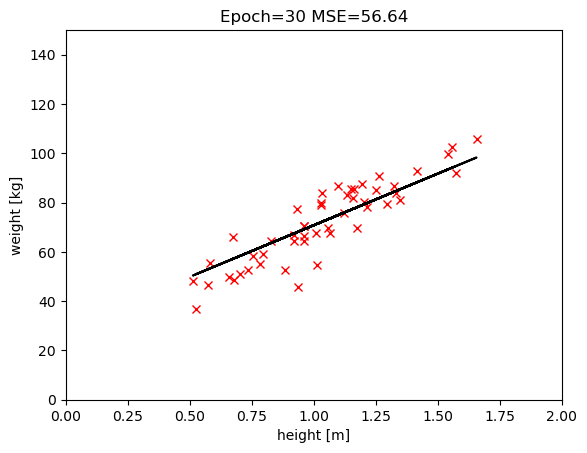

In [19]:
y_h = np.squeeze(model.predict(x))
MSE = np.sum((y-y_h)**2)/N
plt.xlabel('height [m]')
plt.ylabel('weight [kg]')
plt.title(f'Epoch={num_of_epochs} MSE={MSE:.2f}')
plt.axis([0,2,0,150])
plt.plot(x,y,'rx')
plt.plot(x,y_h,'k-')
plt.show()

## Multi-layer Perceptron (MLP)

Multi-layer Perceptron was the main neural model for ML before the convolutional neural networks (CNNs) - the principal idea of training is the same for MLPs and CNNs.

#### Demo: MLP regression of sinusoidal

Generate sinusoidal $y=sin(t)$ which we try to estimate using an MLP structure.

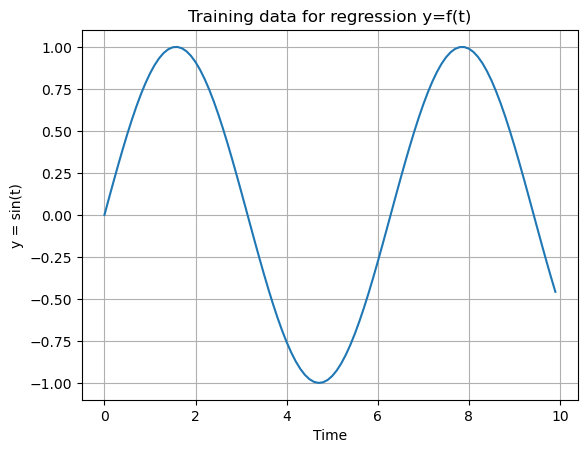

In [25]:
# Generate a sine wave
t = np.arange(0, 10, 0.1);
y = np.sin(t)
plt.plot(t, y)
plt.title('Training data for regression y=f(t)')
plt.xlabel('Time')
plt.ylabel('y = sin(t)')
plt.grid(True, which='both')
plt.show()

Construct an MLP of one processing layer.

In [56]:
# Construct a MPL

# Model sequential
model = Sequential()
# 1st hidden layer (we also need to tell the input dimension)
#   10 neurons, but you can change to play a bit
model.add(Dense(50, input_dim=1, activation='sigmoid'))
## 2nd hidden layer - YOU MAY TEST THIS
#model.add(Dense(100, activation='sigmoid'))
# Output layer
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='tanh'))

We train the network for number of epochs (10-10000, but you may test different values). Set vebose=1 to see progress during training.

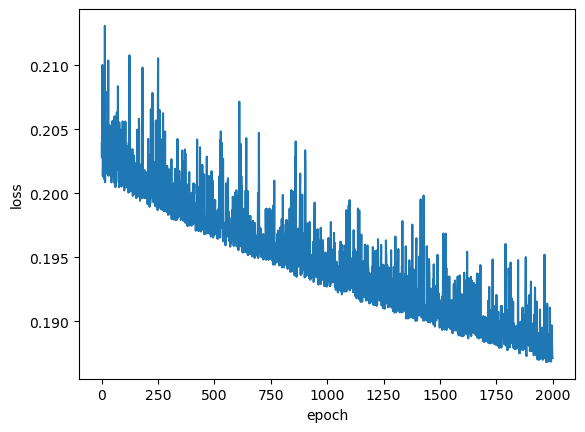

In [60]:
# Learning rate has huge effect 
keras.optimizers.SGD(lr=0.5)
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

tr_hist = model.fit(t, y, epochs=2000, verbose=0)
plt.plot(tr_hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['opetus'], loc='upper right')
plt.show()

Let's test how well the network models the data

4/4 [==============================] - 0s 982us/step
0.09983341664682815
[0.9999959]
71.69967439078698
0.793254599768807
100
79.3254599768807
MSE= 0.18662538821273786


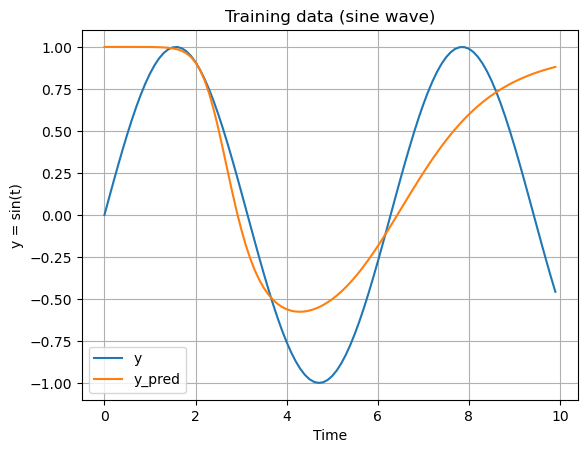

In [61]:
from sklearn.metrics import mean_squared_error 
y_pred = model.predict(t)
print(y[1])
print(y_pred[1])
print(np.sum(np.absolute(np.subtract(y,y_pred)))/len(t))
print(np.square(np.subtract(y,y_pred)).mean())
print(len(y))
print(np.divide(np.sum(np.square(y-y_pred)),len(y)))
print('MSE=',mean_squared_error(y,y_pred))
plt.plot(t, y, label='y')
plt.plot(t, y_pred, label='y_pred')
plt.title('Training data (sine wave)')
plt.xlabel('Time')
plt.ylabel('y = sin(t)')
plt.grid(True, which='both')
plt.legend()
plt.show()

#### Demo: MLP classification

Genera data of hobit and elf heights (training and test data separately)

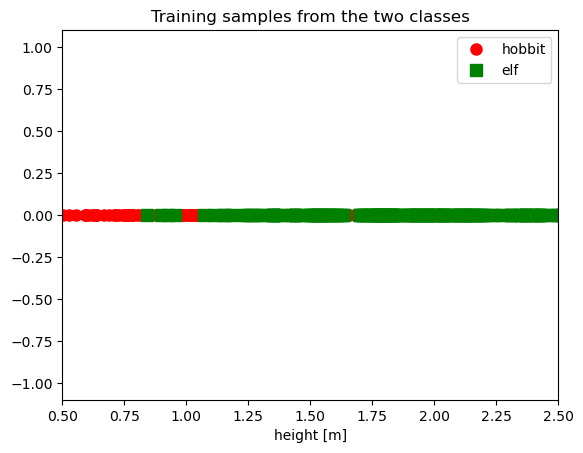

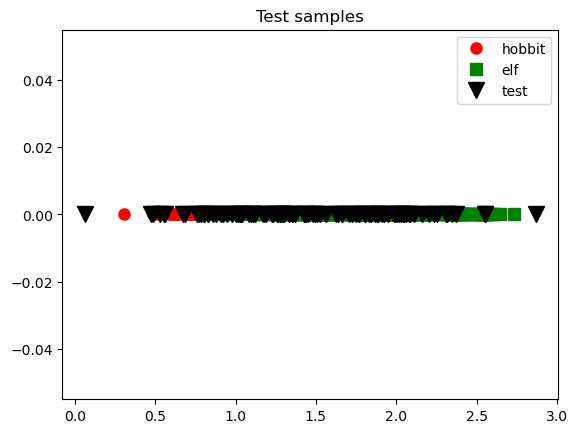

In [62]:
# Coodinate system
plt.xlabel('height [m]')
#plt.ylabel('paino [kg]')
plt.axis([0.5,2.5,-1.1,+1.1])

# Generate random points for training
np.random.seed(11) # to always get the same points
N = 200
x_h = np.random.normal(1.1,0.3,N)
x_e = np.random.normal(1.9,0.4,N)
plt.plot(x_h,np.zeros([N,1]),'ro', markersize=8, label="hobbit")
plt.plot(x_e,np.zeros([N,1]),'gs', markersize=8, label="elf")
plt.title('Training samples from the two classes')
plt.legend()
plt.show()

# Generate random points for testing
N_t =  50
x_h_test = np.random.normal(1.1,0.3,N_t) # h as hobit
x_e_test = np.random.normal(1.9,0.4,N_t) # e as elf
plt.plot(x_h,np.zeros([N,1]),'ro', markersize=8, label="hobbit")
plt.plot(x_e,np.zeros([N,1]),'gs', markersize=8, label="elf")
plt.plot(x_e_test,np.zeros([N_t,1]),'kv',linewidth=1, markersize=12, label="test")
plt.plot(x_h_test,np.zeros([N_t,1]),'kv', markersize=12)
plt.title('Test samples')
plt.legend()
plt.show()

# Form the train input and output vectors  (1: hobit, 2: elf)
x_tr = np.concatenate((x_h,x_e))
y_tr = np.concatenate((1*np.ones([x_h.shape[0],1]),2*np.ones([x_e.shape[0],1])))

# Form the test input and output vectors
x_te = np.concatenate((x_h_test,x_e_test))
y_te = np.concatenate((1*np.ones([N_t,1]),2*np.ones([N_t,1])))

Form a network with **two** outputs.

In [75]:
# With this example you learn the meaning of network size (# of neurons in the first layer: 1 vs. 100)
# and the effect of learning rate 0.1 vs. 0.001

# Sequential model
model = Sequential()
# 1 or 100 neurons on dense layer
model.add(Dense(100, input_dim=1, activation='sigmoid'))
# Two outputs, one for each class
model.add(Dense(2, activation='sigmoid'))
# 0.1 tai 0.001

In [76]:
opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

We need to encode classes as two value "one-hot encoded" output vector.

In [77]:
# Yksi-kuuma (one hot) -koodataan luokka 1 -> [1 0] 2 -> [0 1]
y_tr_2 = np.empty([y_tr.shape[0],2])
y_tr_2[np.where(y_tr==1),0] = 1
y_tr_2[np.where(y_tr==1),1] = 0
y_tr_2[np.where(y_tr==2),0] = 0
y_tr_2[np.where(y_tr==2),1] = 1

Let's train

In [78]:
# Opetus - epokkeja 1 tai 100
model.fit(x_tr, y_tr_2, epochs=100, verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2518 - mse: 0.2518
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2483 - mse: 0.2483
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2466 - mse: 0.2466
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2450 - mse: 0.2450
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2442 - mse: 0.2442
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2416 - mse: 0.2416
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2410 - mse: 0.2410
Epoch 8/100
13/13 [==============================] - 0s 976us/step - loss: 0.2394 - mse: 0.2394
Epoch 9/100
13/13 [==============================] - 0s 702us/step - loss: 0.2383 - mse: 0.2383
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2364 - mse: 0.2364
Epoch 11/100
13/13 [==============================] - 0

13/13 [==============================] - 0s 1ms/step - loss: 0.1401 - mse: 0.1401
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1380 - mse: 0.1380
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1377 - mse: 0.1377
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1370 - mse: 0.1370
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1359 - mse: 0.1359
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1351 - mse: 0.1351
Epoch 92/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1346 - mse: 0.1346
Epoch 93/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1339 - mse: 0.1339
Epoch 94/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1328 - mse: 0.1328
Epoch 95/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1334 - mse: 0.1334
Epoch 96/100
13/13 [==============================] - 0s 951us/

Comput accuracy for the training data and test data. Note that the class is defined by which of the two outputs is larger (kind of likelihood value).

In [79]:
# Test training data
y_tr_pred = np.empty(y_tr.shape)
y_tr_pred_2 = np.squeeze(model.predict(x_tr))
for pred_ind in range(y_tr_pred_2.shape[0]):
    if y_tr_pred_2[pred_ind][0] > y_tr_pred_2[pred_ind][1]:
        y_tr_pred[pred_ind] = 1
    else:
        y_tr_pred[pred_ind] = 2

tot_correct = len(np.where(y_tr-y_tr_pred == 0)[0])
print(f'Classication accuracy (training data): {tot_correct/len(y_tr)*100}%')

13/13 [==============================] - 0s 1ms/step
Classication accuracy (training data): 86.75%


In [80]:
# Test test data
y_te_pred = np.empty(y_te.shape)
y_te_pred_2 = np.squeeze(model.predict(x_te))
for pred_ind in range(y_te_pred_2.shape[0]):
    if y_te_pred_2[pred_ind][0] > y_te_pred_2[pred_ind][1]:
        y_te_pred[pred_ind] = 1
    else:
        y_te_pred[pred_ind] = 2

tot_correct = len(np.where(y_te-y_te_pred == 0)[0])
print(f'Classication accuracy (test data): {tot_correct/len(y_te)*100}%')

4/4 [==============================] - 0s 1ms/step
Classication accuracy (test data): 90.0%


## References

C.M. Bishop (2006): Pattern Recognition and Machine Learning, Chapter 5